In [2]:
import numpy as np                              # linear algebra           
import pandas as pd                             # data processing
import matplotlib.pyplot as plt                 # plotting library
from mpl_toolkits.basemap import Basemap        # library to plot maps, you might have to manually install Basemap ny running "conda install -c anaconda basemap"
import seaborn as sns                           # this one is just for the fancy look

plt.rcParams['figure.figsize']=(9,7)

# Nettoyage des données et traitement de données

In [3]:
data = pd.read_csv('C:/Users/amine/Desktop/Meteorite_Landings.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [4]:
#keep valid entries with known latitude and longitude
data = data[(data.reclat != 0.0) & (data.reclong != 0.0)]
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 39278 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         39278 non-null  object 
 1   id           39278 non-null  int64  
 2   nametype     39278 non-null  object 
 3   recclass     39278 non-null  object 
 4   mass (g)     39147 non-null  float64
 5   fall         39278 non-null  object 
 6   year         39015 non-null  float64
 7   reclat       31963 non-null  float64
 8   reclong      31963 non-null  float64
 9   GeoLocation  31963 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.3+ MB


In [5]:
#look only at the valid entries

valid = data.groupby('nametype').get_group('Valid').copy()
valid.dropna(inplace=True)
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31684 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         31684 non-null  object 
 1   id           31684 non-null  int64  
 2   nametype     31684 non-null  object 
 3   recclass     31684 non-null  object 
 4   mass (g)     31684 non-null  float64
 5   fall         31684 non-null  object 
 6   year         31684 non-null  float64
 7   reclat       31684 non-null  float64
 8   reclong      31684 non-null  float64
 9   GeoLocation  31684 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.7+ MB


# Analayse de statistiques descriptives

In [6]:
valid.describe()

,id,mass (g),year,reclat,reclong
count,31684.000000,3.168400e+04,31684.000000,31684.000000,31684.000000
mean,20731.522156,1.868596e+04,1987.075748,-47.657051,73.474518
std,14954.674207,6.894981e+05,26.795643,46.663352,83.430027
min,1.000000,1.000000e-02,860.000000,-87.366670,-165.433330
25%,9185.750000,6.550000e+00,1983.000000,-79.683330,26.000000
50%,18502.500000,3.015000e+01,1991.000000,-72.000000,57.159545
75%,27286.250000,2.050250e+02,2000.000000,18.375000,159.416360
max,57455.000000,6.000000e+07,2013.000000,81.166670,178.200000


La moyenne de 1.868596e+04 kg indique que la valeur centrale des masses des météorites dans la base de données est d'environ 18 685,96 kg. Cepandant, la moyenne est influencée par des valeurs extrêmement élevées (valeurs aberrantes) et elle ne refléte donc pas la réalité de la plupart des météorites dans la base de données. On conclut cela en regardant la masse maximum qui est de 60 000 000 kg, et en analysant l'écart type qui nous indique que les valeurs de masses des météorites varient avec un écart de 689 498,1 kg. 

La médianne de 3.015000e+01 kg indique que la valeur centrale dans cette base de donnée est de 30.15 kg. On la considère comme une mesure de tendance plus robuste que la moyenne car elle ne peut pas être influencée par les valeurs aberrantes.

Le premier quartile de 6.550000e+00 kg indique que 25% des météorites ont une masse inférieure ou égale à 6.55 kg. Cela montre que la plupart des météorites ont une masse relativement faible.

# Croisement

In [7]:
data_mean = valid.groupby('recclass').mean().drop(['id','reclat','reclong'], axis=1)
data_mean

,mass (g),year
recclass,,
Acapulcoite,246.674414,1994.689655
Acapulcoite/Lodranite,29.820000,1987.666667
Achondrite-ung,1244.281667,1990.250000
Angrite,3046.928333,1969.166667
Aubrite,86028.625306,1971.857143
...,...,...
Stone-ung,0.630000,1982.000000
Ureilite,470.220452,1991.993548
Ureilite-an,1327.900000,1999.000000


In [8]:
data_max =  valid.pivot_table(
    index='year',
    values='mass (g)', 
    aggfunc='max',
    margins=True
)
data_max

,mass (g)
year,
860.0,472.0
1399.0,107000.0
1490.0,103.3
1491.0,127000.0
1575.0,50000000.0
...,...
2010.0,100000.0
2011.0,50000.0
2012.0,12110.0


<function matplotlib.pyplot.show(close=None, block=None)>

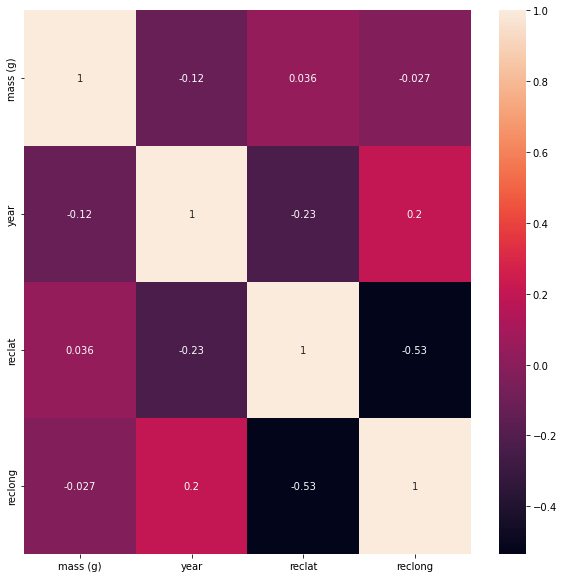

In [9]:
plt.figure(figsize=(10,10))
corr=valid.drop('id', axis=1).corr()
sns.heatmap(corr,annot=True)
plt.show

En ce qui conerne le premier croisement, il nous permet d'analyser la moyenne des masses des météorites par classe.
Le deuxième croisement nous permet d'observer les météorites les plus lourdes par année.


La corrélation entre mass et year est de -0.124224, ce qui signifie qu'il existe une relation faiblement négative entre la masse des météorites et l'année de leur chute. Cela signifie que, dans l'ensemble, les météorites les plus lourdes sont tombées il y a plus longtemps.

La corrélation entre mass et reclat est de 0.036313, ce qui signifie qu'il existe une relation faiblement positive entre la masse des météorites et leur latitude de chute. Cela signifie qu'il y a une légère tendance à ce que les météorites les plus lourdes tombent plus près des pôles.

La corrélation entre mass et reclong est de -0.027074, ce qui signifie qu'il existe une relation faiblement négative entre la masse des météorites et leur longitude de chute. Cela signifie qu'il y a une légère tendance à ce que les météorites les plus lourdes tombent plus près des méridiens de longitude.


# Graphique

Text(0.5, 1.0, 'histograme des masses de toutes les météorites < 200 ')

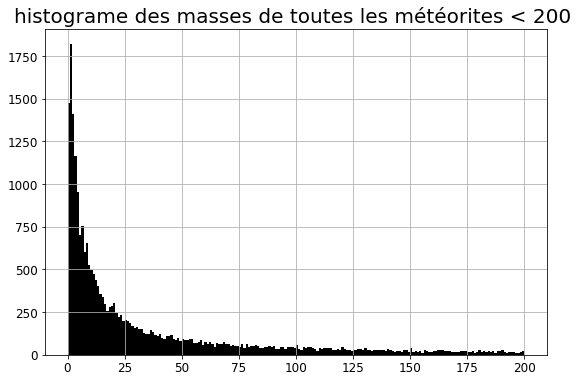

In [10]:
cutoff = 200 #retirer les très grosses météorites
mass = valid[valid['mass (g)']<cutoff]
mass.hist(column='mass (g)', bins=cutoff, xlabelsize=12, ylabelsize=12, figsize=(9,6), \
            label='mass in gram, binsize=1', color='k')
plt.title('histograme des masses de toutes les météorites < 200 ', fontsize=20)



<AxesSubplot:>

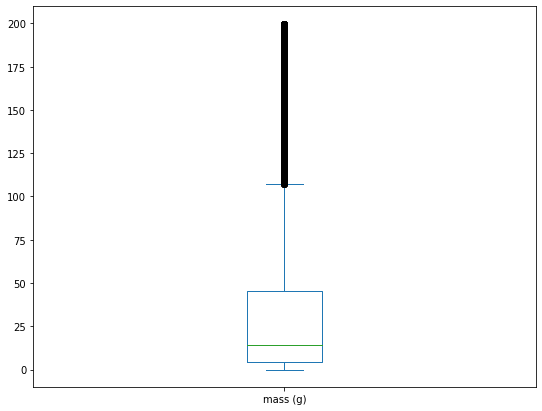

In [11]:
mass['mass (g)'].plot.box()

Text(0.5, 1.0, 'Geographic Distribution of meteorites')

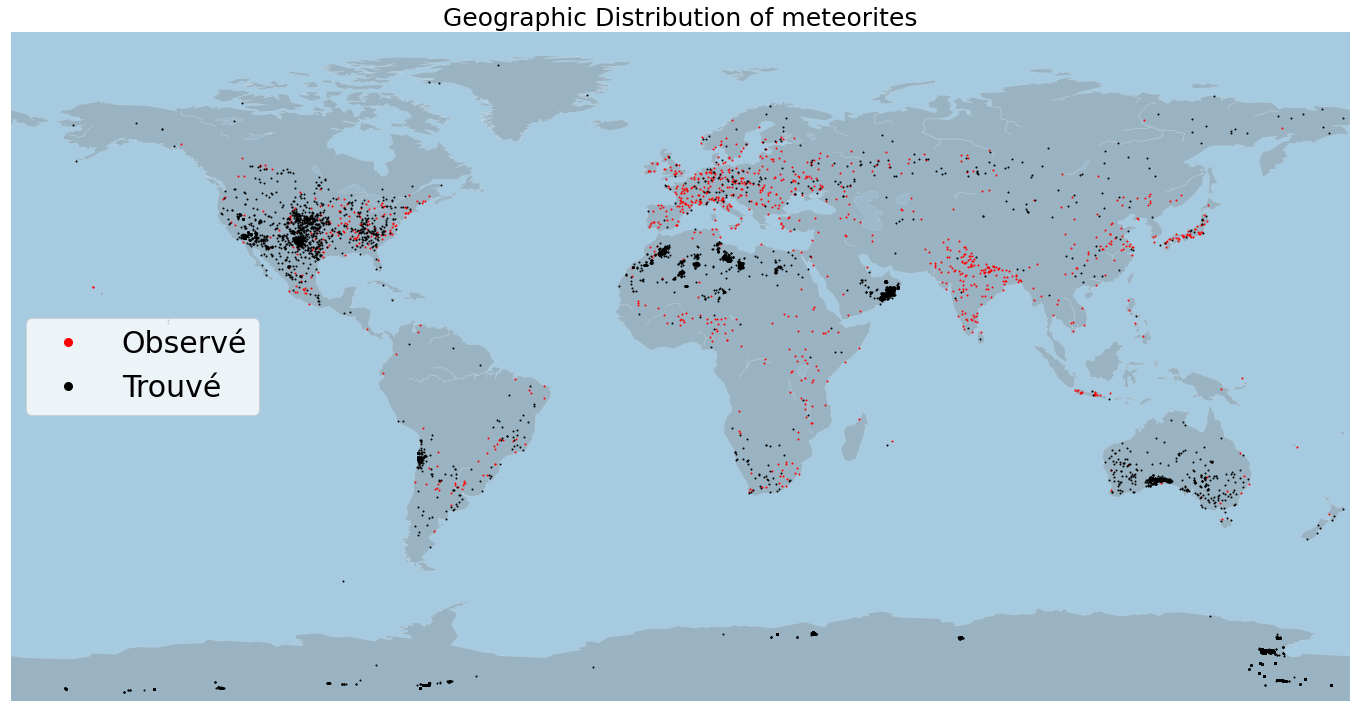

In [12]:
#Séparer les météorites observées des météorites trouvées
fell = valid.where(valid['fall']=='Fell')
found = valid.where(valid['fall']=='Found')

plt.figure(figsize=(24,18))
m=Basemap(llcrnrlon=-180, llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")

m.plot(fell['reclong'], fell['reclat'], linestyle='none', marker='o', ms=1, color='red', label='Observé')
m.plot(found['reclong'], found['reclat'], linestyle='none', marker='o', ms=1, color='black', label='Trouvé')
plt.legend(loc=6, prop={'size': 30}, markerscale=8)
plt.title('Geographic Distribution of meteorites', fontsize=25)

Ecrivez votre réponse ci-dessous
# 1er graphe
Le premier graphique est un histogramme qui montre la distribution des masses des météorites inférieures à 200. Il est clair qu'il y a une très forte densité de météorites dont la masse est comprise entre 0g et 10g, avec un pic d'environ 1750 météorites enregistrées dans cette plage de masses. Cependant, cette densité diminue rapidement pour les masses plus élevées.

# 2eme graphe
le 2eme graphique est une boîte à moustache, en regardant ses résultats, on peut observer que :

La médiane est autour de 14 indique que la valeur centrale des masses des météorites est d'environ 14 grammes.
Le premier quartile est autour de 4 indique que 25% des météorites ont une masse inférieure ou égale à 4.1 grammes.
Le quartile supérieur 45 indique que 75% des météorites ont une masse inférieure ou égale à 45.4 grammes.
Les valeurs extrêmes (110 à 200) indiquent qu'il y a plusieurs météorites qui ont une masse extrêmement élevée, qui peut être considérée comme une valeur aberrante.
Il est important de noter que ces valeurs aberrantes peuvent avoir un impact important sur les statistiques globales, comme la moyenne ou l'écart type, et peut fausser l'interprétation des données. Il est donc important de prendre en compte ces valeurs lors de l'analyse des données.

En utilisant des techniques statistiques plus avancées, il serait possible de modéliser la distribution des masses des météorites et d'estimer les probabilités associées à chaque valeur de la masse des météorites. Cela pourrait permettre de comprendre mieux comment la masse des météorites est distribuée dans la population étudiée, ainsi que les facteurs qui influencent cette distribution.


# 3eme graphe
Le 3ème graphe permet de visualiser la répartition des météorites à travers le monde. Les résultats montrent une faible densité de météorites dans les régions polaires, ce qui est en accord avec les résultats précedemment trouvé en utilisant les correlations. Ces observations sont également en accord avec les tendances générales de la distribution des météorites sur la surface terrestre. Les résultats de cette analyse peuvent contribuer à une meilleure compréhension des processus géologiques et météorologiques impliqués dans la trajectoire et l'impact des météorites sur la terre.

- Il pourrait être interessant de rajouter aux graphiques une analyse nous montrant la masse des plus grosses météorites des dernières années.


<AxesSubplot:xlabel='year', ylabel='mass (g)'>

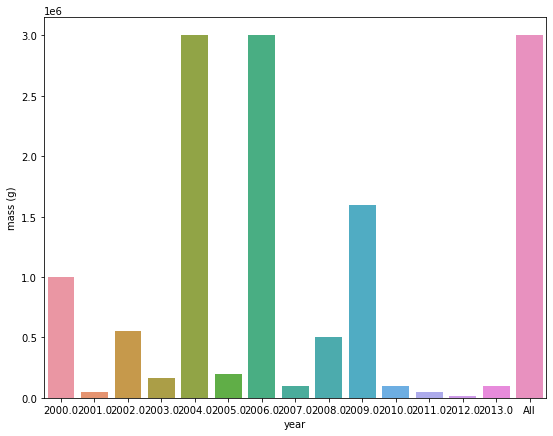

In [13]:
meteorites_1990_2013 = valid[valid["year"].between(2000, 2013)]
data_max =  meteorites_1990_2013.pivot_table(
    index='year',
    values='mass (g)', 
    aggfunc='max',
    margins=True
)
data_index=data_max.reset_index()

sns.barplot(x='year',y='mass (g)',data=data_index)